<a href="https://colab.research.google.com/github/Aniketsh1996/python/blob/main/news_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data Set

In [34]:
import pandas as pd
data = pd.read_csv("WC_AT.csv")
data.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


# Correlation

In [36]:
data.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


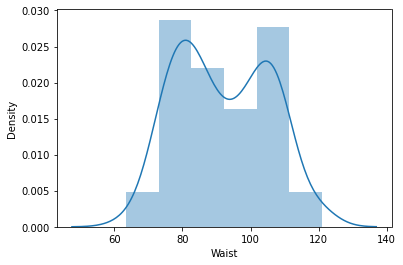

In [37]:
import seaborn as sns
sns.distplot(data['Waist'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


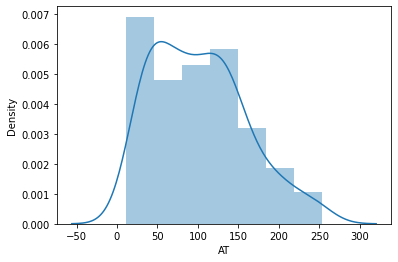

In [38]:
import seaborn as sns
sns.distplot(data['AT'])

Fitting a Linear Regression Model

In [39]:
import statsmodels.formula.api as smf
model = smf.ols("AT~Waist",data = data).fit()

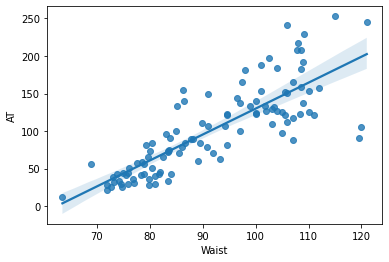

In [40]:
sns.regplot(x="Waist", y="AT", data=data);

In [41]:
#Coefficients
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [42]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    -9.909103
Waist        14.740376
dtype: float64 
 Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64


In [43]:
#R squared values
(model.rsquared)

0.670036893052843

# Predict for new data point

In [44]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])

In [45]:
newdata

0    200
1    300
dtype: int64

In [46]:
data_pred=pd.DataFrame(newdata,columns=['Waist'])

In [47]:
data_pred

,Waist
0,200
1,300


In [48]:
model.predict(data_pred)

0    475.79039
1    821.67633
dtype: float64